In [1]:
import random
import cv2
import matplotlib.pyplot as plt
import albumentations as A

In [2]:
def visualize(image):
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(image)

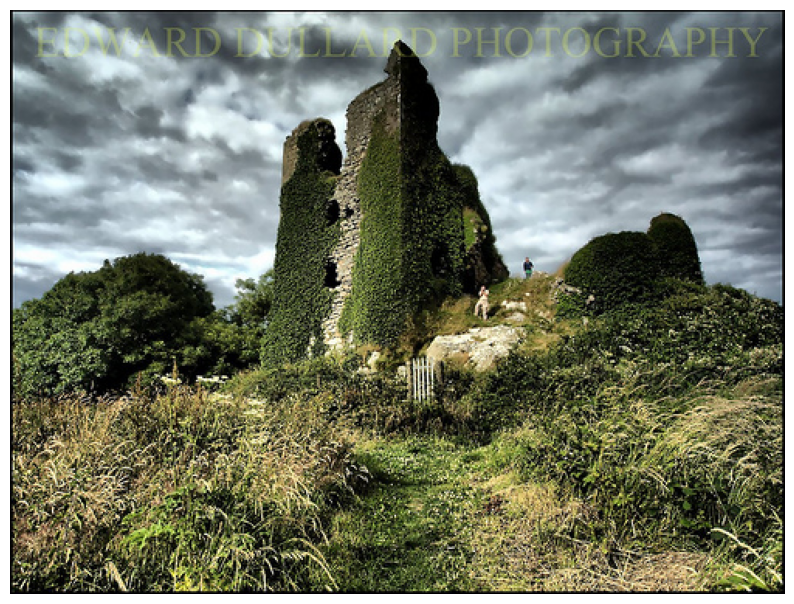

In [3]:
image=cv2.imread("/home/bocheng/data/images/reverse_image_search/train/castle/n02980441_37573.JPEG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

In [13]:
image

array([[[  0,   1,   1],
        [  2,   1,   3],
        [  0,   1,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  1,   3,   4]],

       [[  1,   0,   2],
        [ 24,  20,  25],
        [ 85,  81,  80],
        ...,
        [ 43,  41,  40],
        [ 10,  10,  10],
        [  0,   0,   1]],

       [[  0,   2,   0],
        [ 81,  79,  71],
        [226, 224, 206],
        ...,
        [119, 115, 110],
        [ 43,  41,  40],
        [  2,   4,   5]],

       ...,

       [[  2,   0,   0],
        [ 24,  28,  23],
        [ 27,  35,  25],
        ...,
        [ 30,  51,  48],
        [ 21,  26,  25],
        [  4,   0,   0]],

       [[  5,   1,   6],
        [ 30,  33,  31],
        [ 33,  49,  42],
        ...,
        [  7,   9,  10],
        [  3,   2,   4],
        [  0,   0,   0]],

       [[  7,   2,   3],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   1,   0],
        [  0,   0,   0],
        [  3,   1,   1]]

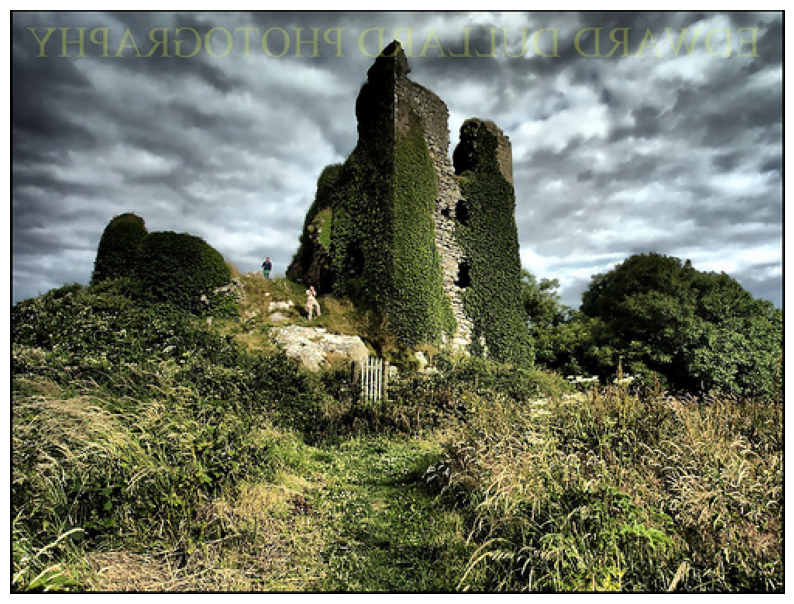

In [4]:
transform=A.HorizontalFlip(p=0.5)
random.seed(7)
augmented_image=transform(image=image)['image']
visualize(augmented_image)

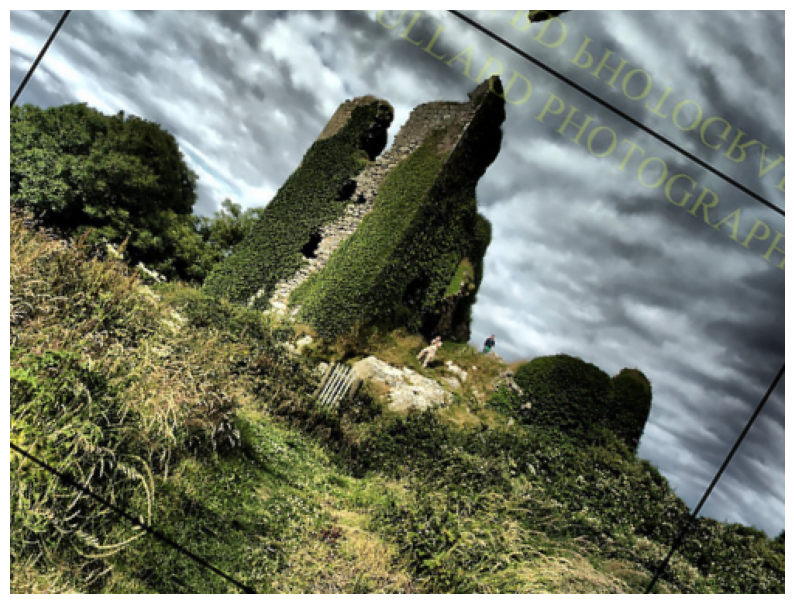

In [5]:
transform=A.ShiftScaleRotate(p=0.5) #仿射变换：平移、缩放和旋转
random.seed(7)
augmented_image=transform(image=image)['image']
visualize(augmented_image)

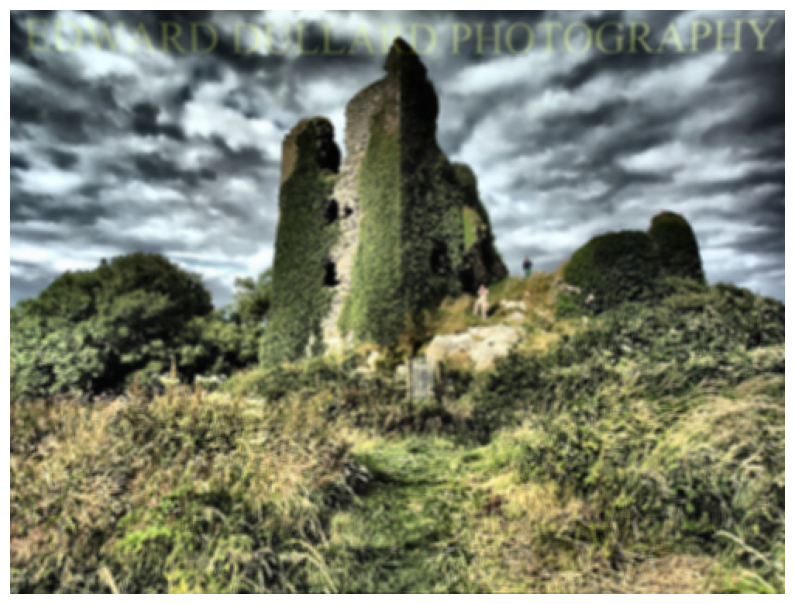

In [6]:
transform=A.Compose(
   [ A.CLAHE(), #直方图均衡化
    A.RandomRotate90(), #随机旋转90度，0次或者多次
    A.Transpose(), #行列转置
    A.ShiftScaleRotate(shift_limit=0.0625,scale_limit=0.50,rotate_limit=45,p=.75), #随机仿射变换
    A.Blur(blur_limit=3), #使用随机大小的核对输入图像进行模糊处理
    A.OpticalDistortion(), #光学畸变
    A.GridDistortion(), #网格畸变
    A.HueSaturationValue() #随机改变图片的 HUE、饱和度和值
    ,]
)
random.seed(42)
augmented_image=transform(image=image)['image']
visualize(augmented_image)

/home/bocheng/softinstalled/anaconda3/envs/cv/lib/python3.9/site-packages/albumentations/imgaug/transforms.py:261: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)
/home/bocheng/softinstalled/anaconda3/envs/cv/lib/python3.9/site-packages/albumentations/imgaug/transforms.py:299: FutureWarning: This IAAPiecewiseAffine is deprecated. Please use PiecewiseAffine instead
  warnings.warn("This IAAPiecewiseAffine is deprecated. Please use PiecewiseAffine instead", FutureWarning)
/home/bocheng/softinstalled/anaconda3/envs/cv/lib/python3.9/site-packages/albumentations/imgaug/transforms.py:231: FutureWarning: IAASharpen is deprecated. Please use Sharpen instead
  warnings.warn("IAASharpen is deprecated. Please use Sharpen instead", FutureWarning)
/home/bocheng/softinstalled/anaconda3/envs/cv/lib/python3.9/site-packages/albumentations/imgaug/transforms.py:174:

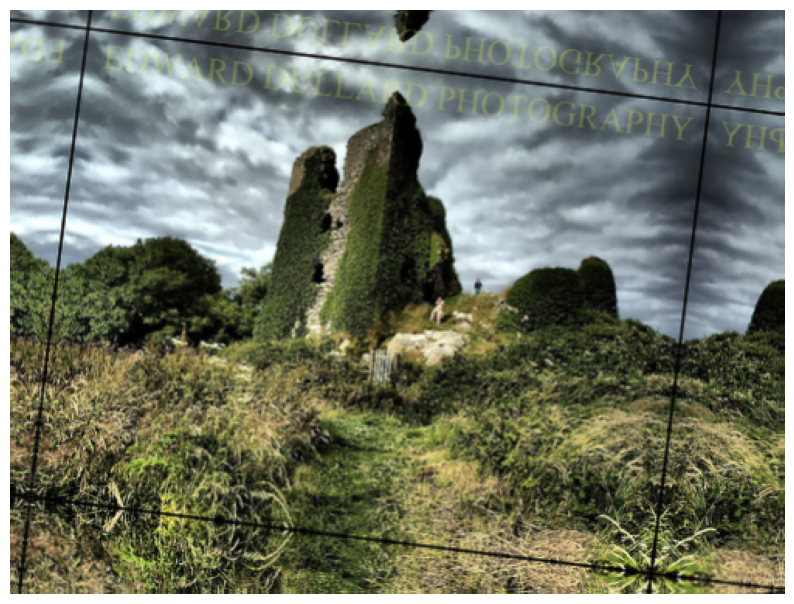

In [8]:
transform = A.Compose([
        A.RandomRotate90(),
        A.Flip(), #将输入进行水平翻转、垂直翻转或同时进行水平和垂直翻转。
        A.Transpose(),
        A.OneOf([
            A.IAAAdditiveGaussianNoise(), #添加高斯噪声，方法已经过时
            A.GaussNoise(),#添加高斯噪声
        ], p=0.2),
        A.OneOf([
            A.MotionBlur(p=.2), #使用随机大小的核对输入图像应用运动模糊。
            A.MedianBlur(blur_limit=3, p=0.1), #使用具有随机孔径线性大小的中值滤波器对输入图像进行模糊处理。
            A.Blur(blur_limit=3, p=0.1), #使用随机大小的核对输入图像进行模糊处理。
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        A.OneOf([
            A.OpticalDistortion(p=0.3),
            A.GridDistortion(p=.1),
            A.IAAPiecewiseAffine(p=0.3), #畸变
        ], p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.IAASharpen(), #对图像进行锐化处理
            A.IAAEmboss(), #浮雕效果
            A.RandomBrightnessContrast(),  #随机调整图像的亮度和对比度           
        ], p=0.3),
        A.HueSaturationValue(p=0.3), #调整图像的色调、饱和度和值（亮度）
    ])
random.seed(42) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)